# Valmistellaan Boston datasetti

In [557]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

sns.set()

In [558]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

# boston_dataset is a dictionary
# let's check what it contains
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [559]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [560]:
boston['MEDV'] = boston_dataset.target

In [561]:
# check for missing values in all the columns
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [604]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

In [563]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(253, 2)
(253, 2)
(253,)
(253,)


# Lineaarinen regressio

In [564]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [565]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.471476336906222
R2 score is 0.6475751987411287


The model performance for testing set
--------------------------------------
RMSE is 5.5931794649535576
R2 score is 0.6264234348863683


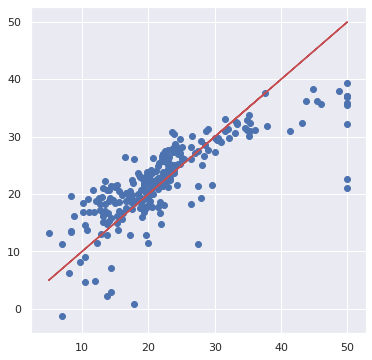

In [566]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
y_poly_pred = lin_model.predict(X_train)

plt.figure(figsize=(6,6))
plt.plot(Y_test, Y_test, color='r')
plt.scatter(Y_test, y_test_predict)
plt.show()

# Decision Tree (Päätöspuu)

In [567]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plot

## Oppiminen

Parametri *max_depth* määrittää puun enimmäissyvyyden.

In [568]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(253, 2)
(253, 2)
(253,)
(253,)


In [569]:
%%time
#Line magic funtion has to be on the first line, otherwise throws an "not found" error

max_depth = 3
dt_reg = DecisionTreeRegressor(max_depth=max_depth)
dt_reg.fit(X_train, Y_train)

y_preds = dt_reg.predict(X_train)

CPU times: user 2.04 ms, sys: 78 µs, total: 2.11 ms
Wall time: 2.27 ms


Voimme visualisoida tulokset, jos käytämme vain yhtä atribuuttia:

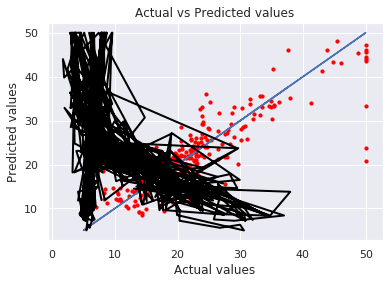

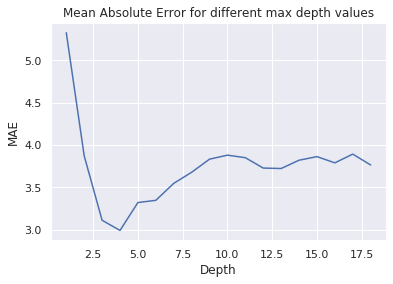

In [601]:
maeList = []
depthList = []


for depths in range(1, 19):
    dt_reg = DecisionTreeRegressor(random_state=0, max_depth=depths)
    dt_reg.fit(X_train, Y_train)
    preds = dt_reg.predict(X_test)
    this_mae = mean_absolute_error(Y_test, preds)
    maeList.append(this_mae)
    depthList.append(depths)

                  
plot.figure(1)
plot.plot(Y_test, Y_test)
plot.plot(X, dt_reg.predict(X), color='black', lw=2)

plot.scatter(Y_test, y_preds, s=10, c="red")
plot.title("Actual vs Predicted values")
plot.xlabel("Actual values")
plot.ylabel("Predicted values")

plot.figure(2)
plot.plot(depthList, maeList)
plot.title("Mean Absolute Error for different max depth values")
plot.xlabel("Depth")
plot.ylabel("MAE")

plot.show()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
reg_x = np.arange(np.argmin(X_train), np.argmax(X_train), 0.01).reshape(-1, 1)
print(reg_x[0:10])
reg_x.dtype

In [ ]:
print(dt_reg.predict(reg_x))

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(Y_test, y_preds, s=5)

plt.plot(reg_x, dt_reg.predict(reg_x), lw=4, c=sns.color_palette()[1],
             label='decision tree')
plt.legend(loc='best');

## Interface

Käytämme *keskimääräistä neliövirhettä* suorituskyvyn mittana regressioalgoritmillemme:

In [571]:
%%time

predictions_dt = dt_reg.predict(X_test)
print("Mean squared error: %.3f"
      % mean_squared_error(Y_test, predictions_dt))

Mean squared error: 31.289
CPU times: user 1.58 ms, sys: 0 ns, total: 1.58 ms
Wall time: 1.45 ms


# Random forest

Random forest on päätöksentekopuiden kokonaisuus (tai ryhmä; tästä syystä nimi metsä), joka saadaan tuomalla satunnaisuus puun sukupolveen. Satunnaisen metsän ennuste saadaan yksittäisten puiden ennusteiden keskiarvolla.

Random forest on tehokas ja tuottaa melkein aina käyttökelpoisia tuloksia ilman paljon viritystä.

## Oppiminen

Satunnaiset metsäluokittelijat ovat nopeasti kouluttavia, melko vakaita hyperparametrien arvoihin ja toimivat usein suhteellisen hyvin.

In [572]:
%%time

n_estimators = 10
max_depth = 3
rf_reg = RandomForestRegressor(n_estimators=n_estimators,
                               max_depth=max_depth)
rf_reg.fit(X_train, Y_train)

y_preds = rf_reg.predict(X_test)

CPU times: user 13.2 ms, sys: 44 µs, total: 13.3 ms
Wall time: 13.1 ms


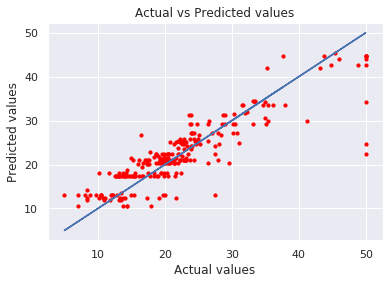

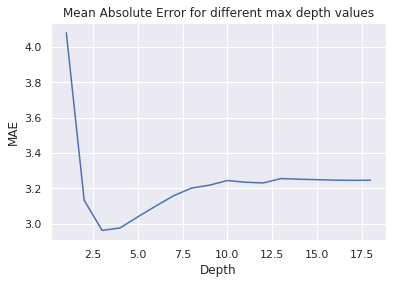

In [573]:
maeList = []
depthList = []

for depths in range(1, 19):
    rf_reg = RandomForestRegressor(random_state=0, max_depth=depths)
    rf_reg.fit(X_train, Y_train)
    preds = rf_reg.predict(X_test)
    this_mae = mean_absolute_error(Y_test, preds)
    maeList.append(this_mae)
    depthList.append(depths)
    
plot.figure(1)
plot.plot(Y_test, Y_test)
plot.scatter(Y_test, y_preds, s=10, c="red")
plot.title("Actual vs Predicted values")
plot.xlabel("Actual values")
plot.ylabel("Predicted values")

plot.figure(2)
plot.plot(depthList, maeList)
plot.title("Mean Absolute Error for different max depth values")
plot.xlabel("Depth")
plot.ylabel("MAE")

plot.show()

## Interface

In [574]:
%%time

predictions_rf = rf_reg.predict(X_test)
print("Mean squared error: %.3f"
      % mean_squared_error(Y_test, predictions_rf))

Mean squared error: 21.947
CPU times: user 9.27 ms, sys: 44 µs, total: 9.31 ms
Wall time: 8.85 ms


# Gradient boosted trees (XGBoost)

Gradientilla korotetut puut (tai äärimmäisillä kaltevuudella korostetut puut) on toinen tapa rakentaa päätöspuiden kokoonpanoja tehostuskehyksen avulla. Käytetään suosittua erillistä pakettia XGBoost kouluttaaksemme gradienttikorostettuja puita regressiota varten.

XGBoostia on äskettäin käytetty ennätystulosten saavuttamiseen monissa koneoppimiskilpailuissa, mutta sillä on melko paljon hyperparametreja, jotka on viritettävä huolellisesti parhaan suorituskyvyn saamiseksi.

## Oppiminen

In [575]:
%%time

xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, Y_train)

y_preds = rf_reg.predict(X_test)

[19:48:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 18.6 ms, sys: 91 µs, total: 18.7 ms
Wall time: 18.1 ms


[19:48:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:48:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:48:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:48:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:48:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:48:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost

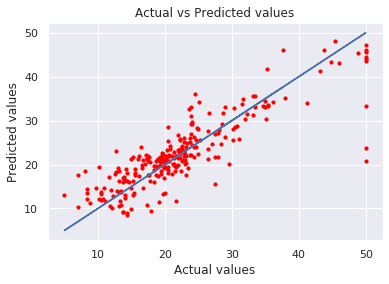

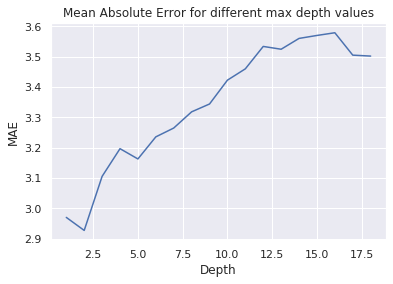

In [576]:
maeList = []
depthList = []

for depths in range(1, 19):
    xgb_reg = XGBRegressor(random_state=0, max_depth=depths)
    xgb_reg.fit(X_train, Y_train)
    preds = xgb_reg.predict(X_test)
    this_mae = mean_absolute_error(Y_test, preds)
    maeList.append(this_mae)
    depthList.append(depths)
    
plot.figure(1)
plot.plot(Y_test, Y_test)
plot.scatter(Y_test, y_preds, s=10, c="red")
plot.title("Actual vs Predicted values")
plot.xlabel("Actual values")
plot.ylabel("Predicted values")

plot.figure(2)
plot.plot(depthList, maeList)
plot.title("Mean Absolute Error for different max depth values")
plot.xlabel("Depth")
plot.ylabel("MAE")

plot.show()

## Interface

In [577]:
%%time

predictions_xgb = xgb_reg.predict(X_test)
print("Mean squared error: %.3f"
      % mean_squared_error(Y_test, predictions_xgb))

Mean squared error: 24.777
CPU times: user 3.86 ms, sys: 0 ns, total: 3.86 ms
Wall time: 3.32 ms


In [578]:
print("Decision Tree mean squared error: %.3f" % mean_squared_error(Y_test,predictions_dt))
print("Random Forest mean squared error: %.3f" % mean_squared_error(Y_test,predictions_rf))
print("XGBoost mean squared error: %.3f" % mean_squared_error(Y_test,predictions_xgb))

Decision Tree mean squared error: 31.289
Random Forest mean squared error: 21.947
XGBoost mean squared error: 24.777
